In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data2.csv')
df.head()

StartDate              EndDate  Status  IPAddress  Progress  \
0  2022-05-18 14:32:58  2022-05-18 14:32:58       4        NaN       NaN   
1  2022-05-18 14:32:58  2022-05-18 14:32:58       4        NaN       NaN   
2  2022-05-18 14:32:58  2022-05-18 14:32:58       4        NaN       NaN   
3  2022-05-18 14:32:58  2022-05-18 14:32:58       4        NaN       NaN   
4  2022-05-18 14:32:58  2022-05-18 14:32:58       4        NaN       NaN   

   Duration (in seconds)  Finished         RecordedDate         ResponseId  \
0                    666         1  2022-05-18 14:32:58  R_0k8BOwYq4YanjTw   
1                    331         1  2022-05-18 14:32:58  R_3Qwk1bf7vTSDD4a   
2                    251         1  2022-05-18 14:32:58  R_6DqJ9Az23Ts6OF0   
3                    464         1  2022-05-18 14:32:58  R_bvYnEyoivPI2qzQ   
4                    148         1  2022-05-18 14:32:58  R_eJ88ubqHdfU9Y4C   

   LocationLatitude  ...  Q46 - Topic Sentiment Label  \
0               NaN  ...                          NaN   
1               NaN  ...                          NaN   
2               NaN  ...                          NaN   
3               NaN  ...                          NaN   
4               NaN  ...                          NaN   

   Q46 - Topic Sentiment Score  Q46 - Topics  Q47 - Parent Topics  \
0                          NaN       Unknown                  NaN   
1                          NaN       Unknown                  NaN   
2                          NaN           NaN                  NaN   
3                          NaN           NaN                  NaN   
4                          NaN           NaN                  NaN   

   Q47 - Sentiment Polarity  Q47 - Sentiment Score  Q47 - Sentiment  \
0                       0.0                   -2.0    Very Negative   
1                       0.0                    0.0          Neutral   
2                       NaN                    NaN              NaN   
3                       NaN                    NaN              NaN   
4                       NaN                    NaN              NaN   

   Q47 - Topic Sentiment Label  Q47 - Topic Sentiment Score  Q47 - Topics  
0                          NaN                          NaN       Unknown  
1                          NaN                          NaN       Unknown  
2                          NaN                          NaN           NaN  
3                          NaN                          NaN           NaN  
4                          NaN                          NaN           NaN  

[5 rows x 123 columns]

In [3]:
breakout_fields = ['Host/Work Country','Function','Employee Category','Career Community']
result_fields = ['Q9','Q12','Q14','Q23']

In [4]:
print(df.columns.tolist())

['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'LocationLatitude', 'LocationLongitude', 'Q3', 'Q51', 'Q6', 'Q7', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q53', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q46', 'Q47', 'Q_Units', 'Q46_Strengthen_EN', 'Q47_Change_EN', 'Sub-Department', 'Functional Organization Unit 7 Text', 'SHARP Functional Guidance GUID 2', 'Functional Organization Unit 4 Text', 'Functional Organization Unit 3 Text', 'Sub-Function', 'Functional Organization Unit 9 Text', 'Functional Organization Unit 1 Text', 'SHARP Functional Guidance GUID', 'Section', 'Functional Organization Unit 6 Text', 'Function', 'Department', 'Functional Organization Unit 8 Text', 'Functional Organization Unit 0 Text', 'Division', 'Functional Organization Unit 5 Text', 'Functional Organization Unit 2 Text', 'Caree

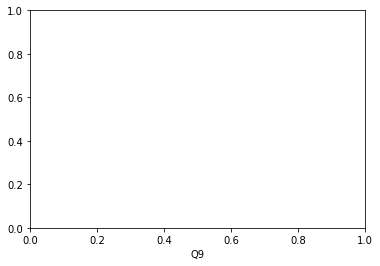

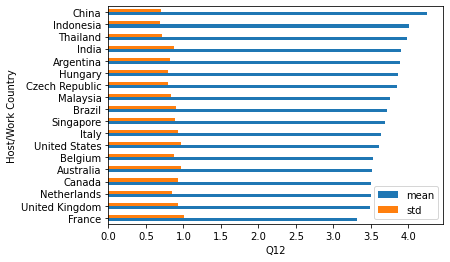

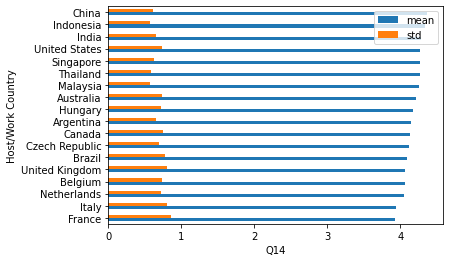

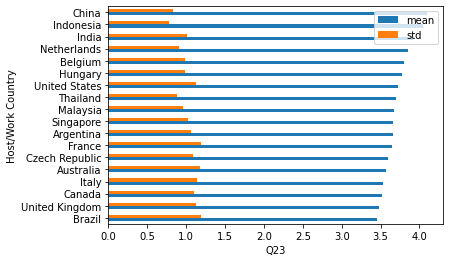

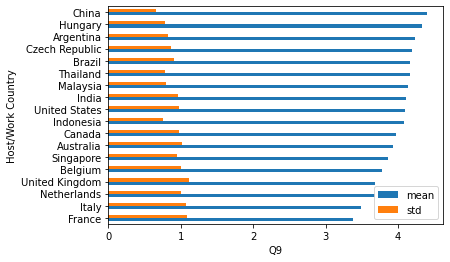

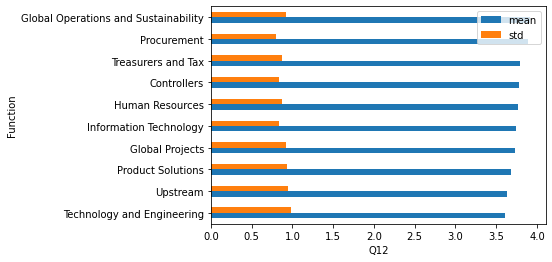

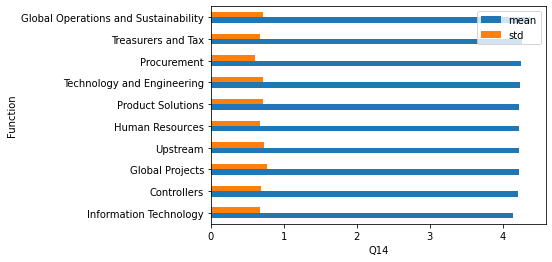

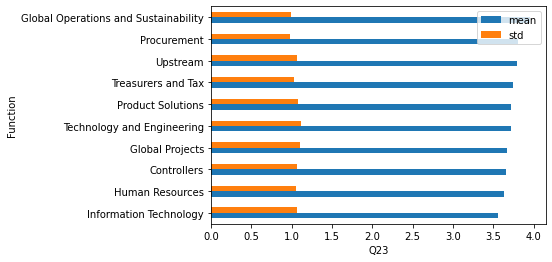

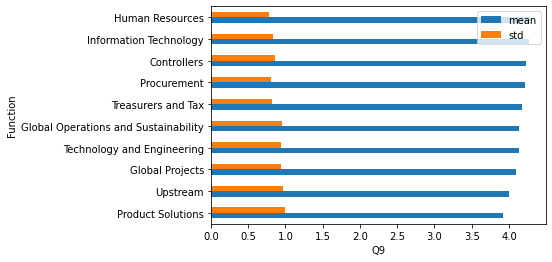

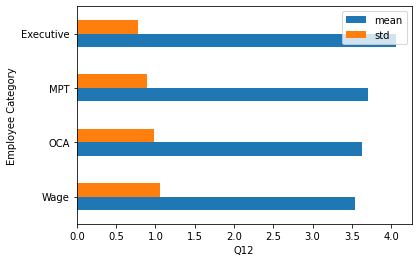

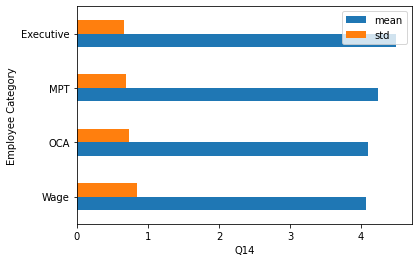

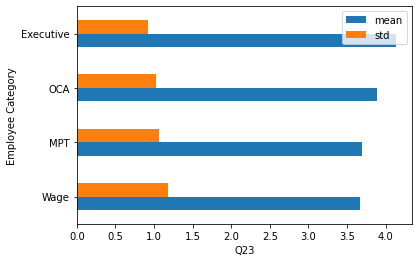

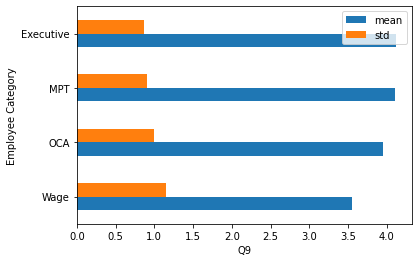

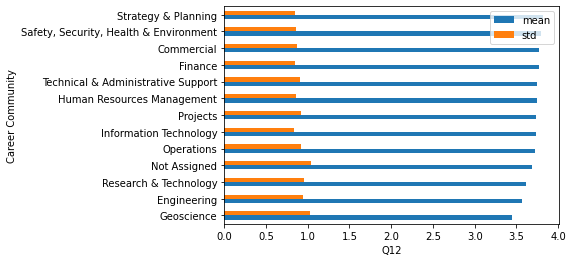

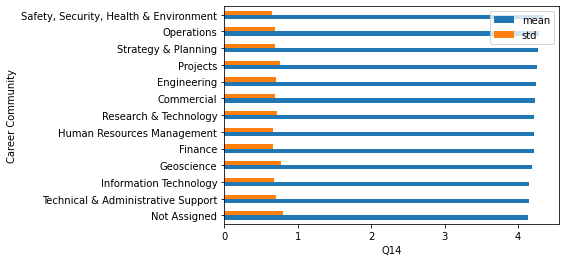

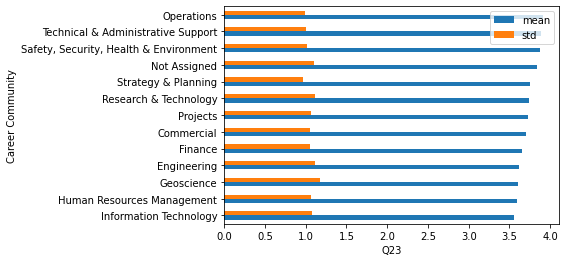

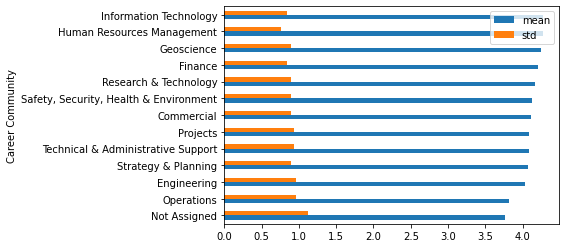

In [5]:
def plot_rel(breakout_field, result_field):
    plt.xlabel(result_field)
    description = df.groupby(breakout_field)[result_field].describe().sort_values('mean',ascending=False)
    description = description[description['count']>(len(df)/100)]
    description[['mean','std']].sort_values('mean').plot.barh()
for breakout_field in breakout_fields:
    for result_field in result_fields:
        plot_rel(breakout_field,result_field)

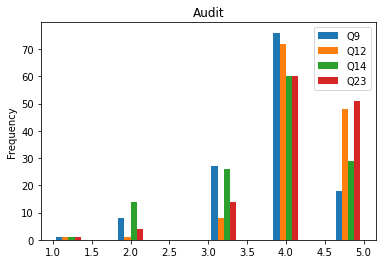

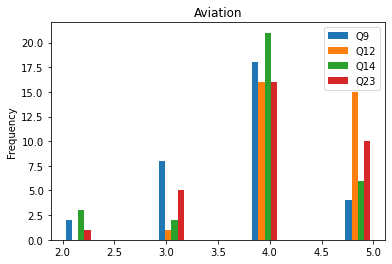

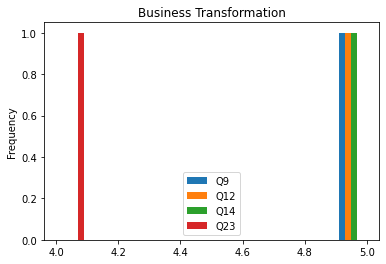

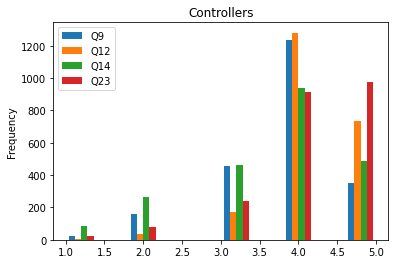

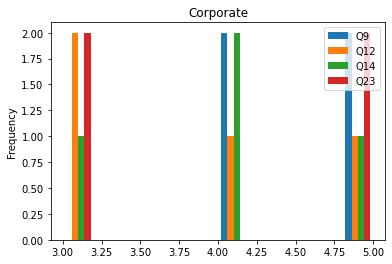

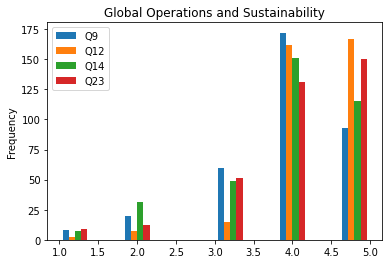

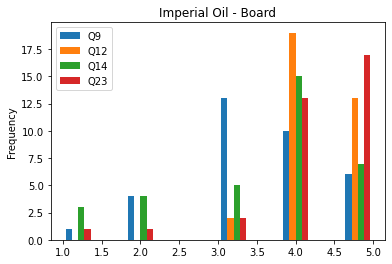

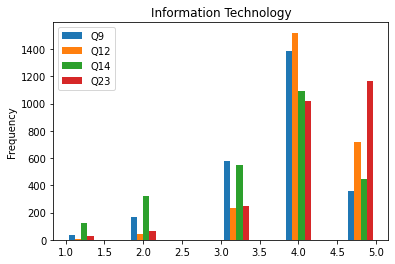

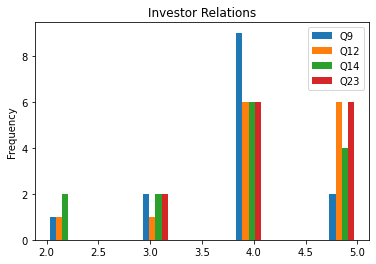

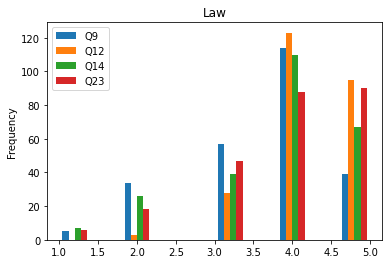

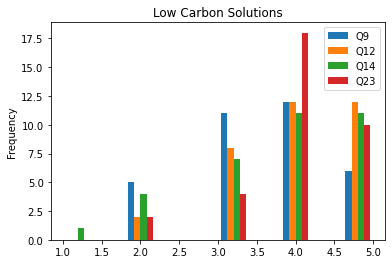

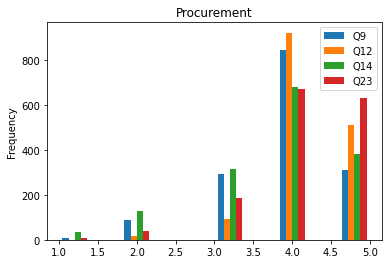

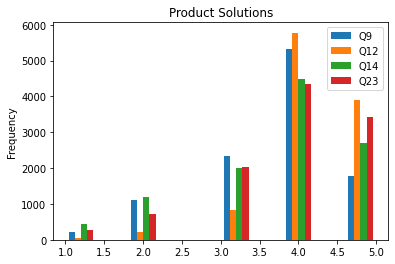

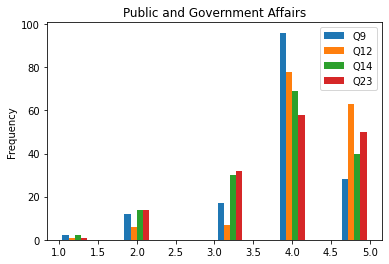

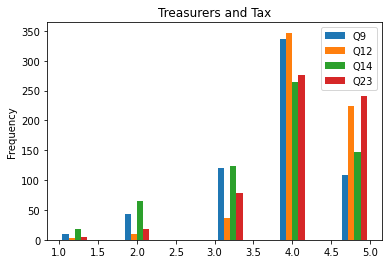

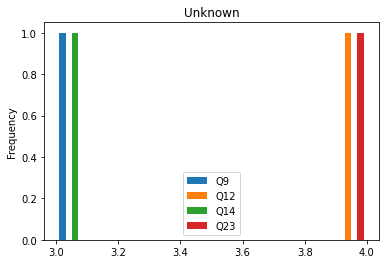

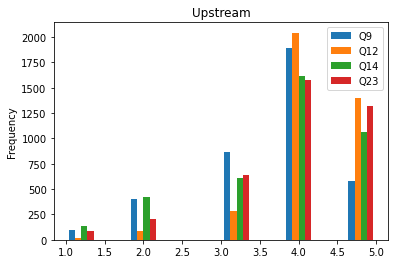

In [6]:
def plot_hists(breakout_field, result_field):
    plt.xlabel(result_field)
    df.dropna(subset=[result_field]).dropna(subset=[breakout_field])[df[breakout_field].map(df[breakout_field].value_counts() > len(df)/100)][[breakout_field,'result_field']].groupby(breakout_field).plot.hist(by=breakout_field)
def plot_mult_hists(breakout_field, result_fields):
    fields_to_include = result_fields + [breakout_field]
    # df.dropna(subset=fields_to_include)[df[breakout_field].map(df[breakout_field].value_counts() > len(df)//100)][fields_to_include].groupby(breakout_field).plot.hist(by=breakout_field)
    df.dropna(subset=fields_to_include)[fields_to_include].groupby(breakout_field).plot.hist(by=breakout_field)
plot_mult_hists('Function', result_fields)

In [7]:
from scipy import stats

In [8]:
def kruskal(breakout_field, result_field):
    grouped_data = [group[result_field].values for name, group in df.dropna(
        subset=[result_field]).groupby(breakout_field)]
    return stats.kruskal(*grouped_data)


for breakout_field in breakout_fields:
    for result_field in result_fields:
        print(f"{breakout_field.upper()} | {result_field.upper()}")
        print(kruskal(breakout_field, result_field))
        print()


HOST/WORK COUNTRY | Q9
KruskalResult(statistic=1322.0717713838242, pvalue=1.3152003013318598e-235)

HOST/WORK COUNTRY | Q12
KruskalResult(statistic=565.839396705747, pvalue=2.014885531108416e-82)

HOST/WORK COUNTRY | Q14
KruskalResult(statistic=539.5027142472151, pvalue=2.5392253379292327e-77)

HOST/WORK COUNTRY | Q23
KruskalResult(statistic=1040.276858905346, pvalue=1.5574160212512875e-177)

FUNCTION | Q9
KruskalResult(statistic=182.46242829995555, pvalue=2.9528329564008015e-27)

FUNCTION | Q12
KruskalResult(statistic=96.57534249091474, pvalue=2.5440767639197548e-11)

FUNCTION | Q14
KruskalResult(statistic=147.69241317662554, pvalue=1.3022196255741836e-20)

FUNCTION | Q23
KruskalResult(statistic=566.6259812256612, pvalue=8.65330263378e-106)

EMPLOYEE CATEGORY | Q9
KruskalResult(statistic=245.19829651021428, pvalue=7.150323643275789e-53)

EMPLOYEE CATEGORY | Q12
KruskalResult(statistic=330.0235982715107, pvalue=3.1536156759737074e-71)

EMPLOYEE CATEGORY | Q14
KruskalResult(statistic=25

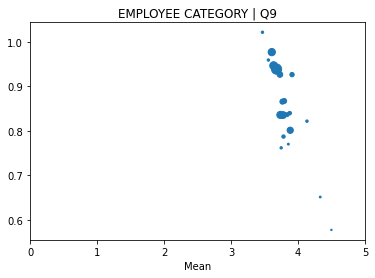

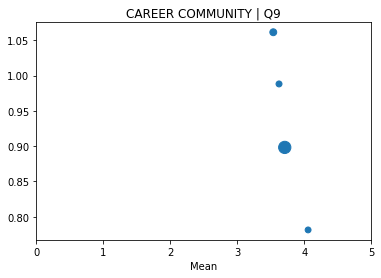

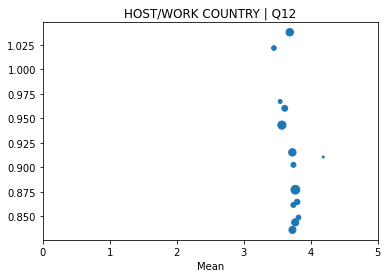

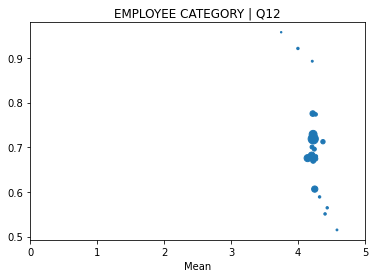

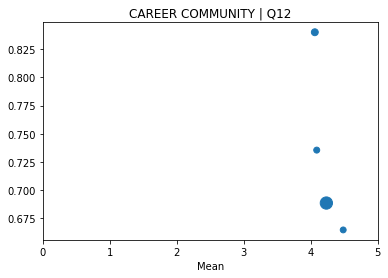

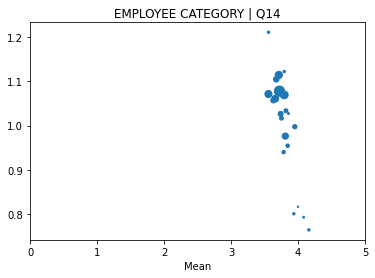

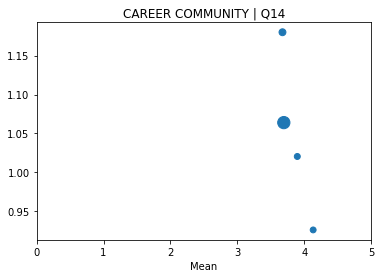

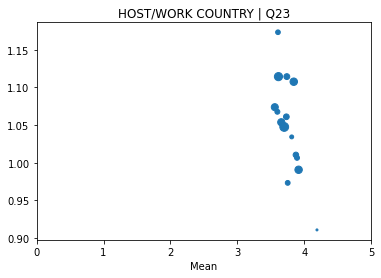

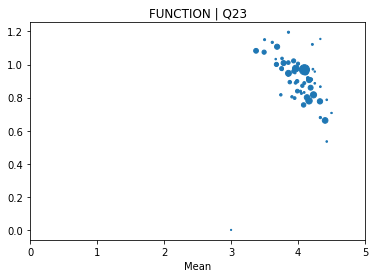

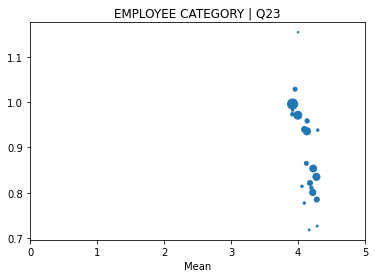

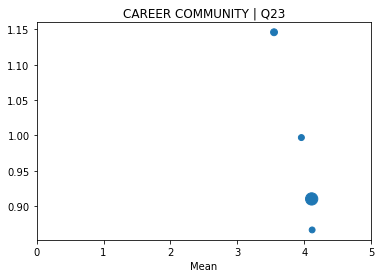

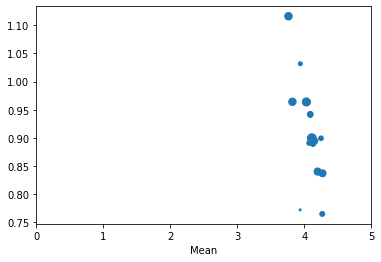

In [9]:
def plot_scatter_dist(breakout_field, result_field):
    plt.title(f"{breakout_field.upper()} | {result_field.upper()}")
    means = df.dropna(subset=[result_field]).groupby(breakout_field)[result_field].mean()
    stdevs = df.dropna(subset=[result_field]).groupby(breakout_field)[result_field].std()
    size = np.sqrt(df.dropna(subset=[result_field]).groupby(breakout_field)[result_field].count())
    fig, ax = plt.subplots()
    ax.set_xlabel('Mean')
    ax.set_xlim(0,5)
    ax.set_ylabel=('Stdev')
    ax.scatter(means,stdevs,s=size)
    # fig.show()

for result_field in result_fields:
    for breakout_field in breakout_fields:
        plot_scatter_dist(breakout_field,result_field)
